##  CARDIOVASCULAR DISEASE PREDICTION USING MACHINE LEARNING 

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
#IMPORTING LIBRARIES
import pandas as pd   #data manipulation, cleaning and analysiS
import numpy as np   #computations by numbers and working with arrays.
import seaborn as sns  #for heatmap and boxplot
import matplotlib.pyplot as plt  #for graphs
from sklearn.model_selection import train_test_split  #for machine learning models
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## LOADING DATA

In [3]:
# Loading dataset
file_path = "cardio_dataset.csv" 
data = pd.read_csv(file_path)

In [4]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [5]:
# Display dataset
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [6]:
print(data.dtypes)

id                       int64
age                      int64
gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category             object
bp_category_encoded     object
dtype: object


## BOX PLOTS

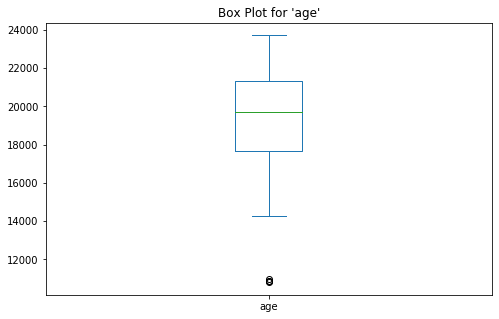

In [7]:
import matplotlib.pyplot as plt

# Box plot example
plt.figure(figsize=(8, 5))
data['age'].plot(kind='box')
plt.title("Box Plot for 'age'")
plt.show()

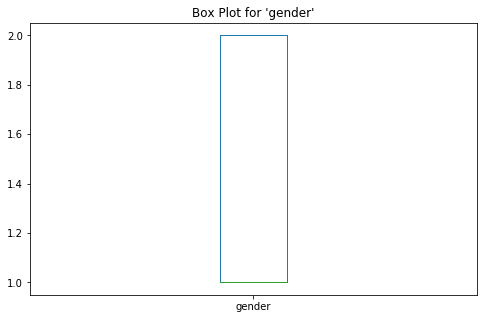

In [8]:
import matplotlib.pyplot as plt

# Box plot example
plt.figure(figsize=(8, 5))
data['gender'].plot(kind='box')
plt.title("Box Plot for 'gender'")
plt.show()

## SCATTER PLOT

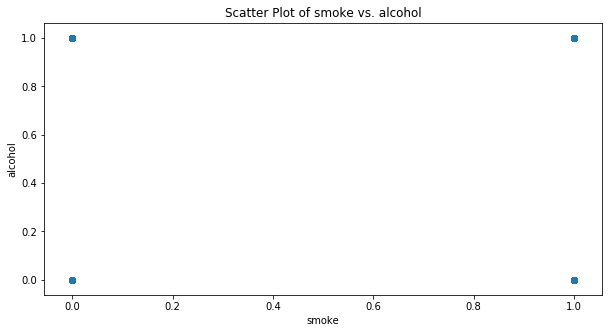

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['smoke'], data['alco'])
plt.title("Scatter Plot of smoke vs. alcohol")
plt.xlabel('smoke')
plt.ylabel('alcohol')
plt.show()

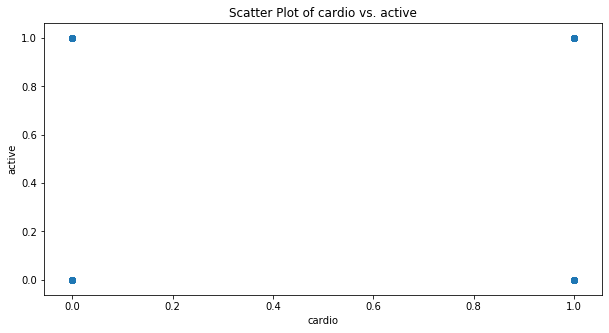

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(data['cardio'], data['active'])
plt.title("Scatter Plot of cardio vs. active")
plt.xlabel('cardio')
plt.ylabel('active')
plt.show()

In [11]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers by filtering for values within the IQR bounds
data_removing_outliers = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

print("Data shape before removing outliers:", data.shape)
print("Data shape after removing outliers:", data_removing_outliers.shape)


Data shape before removing outliers: (68205, 17)
Data shape after removing outliers: (68201, 17)


## NORMALIZATION

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Apply Min-Max Scaling only to numeric columns
scaler = MinMaxScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [13]:
print("Normalized Data:\n", data)

Normalized Data:
             id       age  gender    height    weight     ap_hi     ap_lo  \
0      0.00000  0.588076     1.0  0.579487  0.269841  0.222222  0.333333   
1      0.00001  0.730159     0.0  0.517949  0.391534  0.555556  0.500000   
2      0.00002  0.624003     0.0  0.564103  0.280423  0.444444  0.166667   
3      0.00003  0.528455     1.0  0.584615  0.375661  0.666667  0.666667   
4      0.00004  0.516918     0.0  0.517949  0.238095  0.111111  0.000000   
...        ...       ...     ...       ...       ...       ...       ...   
68200  0.99994  0.653659     1.0  0.579487  0.343915  0.333333  0.333333   
68201  0.99996  0.913899     0.0  0.528205  0.608466  0.555556  0.500000   
68202  0.99997  0.640186     1.0  0.656410  0.497354  1.000000  0.500000   
68203  0.99999  0.900736     0.0  0.553846  0.322751  0.500000  0.333333   
68204  1.00000  0.754317     0.0  0.589744  0.322751  0.333333  0.333333   

       cholesterol  gluc  smoke  alco  active  cardio  age_years     

In [14]:
data.isna().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

## VISUALISATION

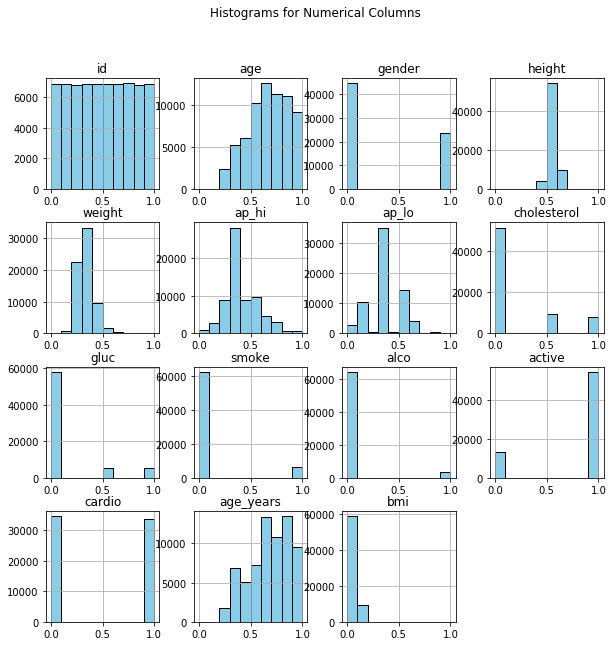

In [15]:
# Plot histogram for each numerical feature
data.hist(bins=10, figsize=(10, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Numerical Columns")
plt.show()

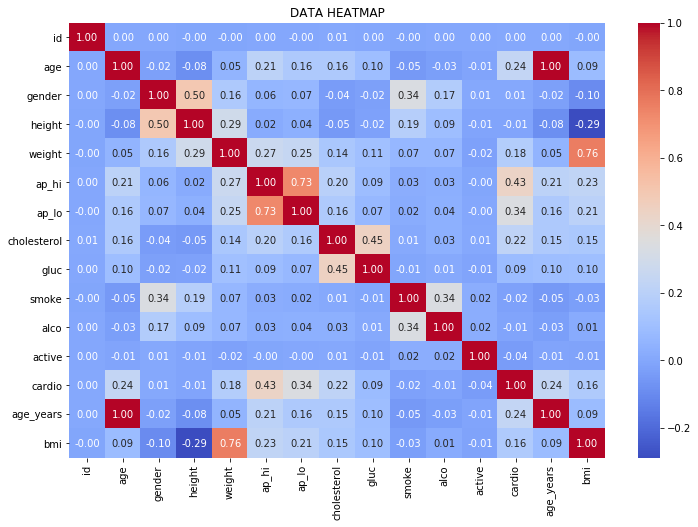

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("DATA HEATMAP")
plt.show()

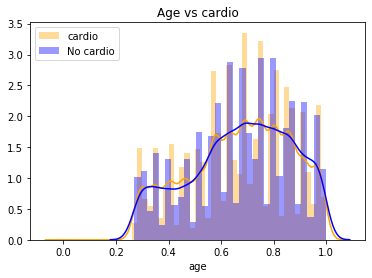

In [17]:
sns.distplot(data[data['active'] == 1]['age'], kde=True, color='orange', label='cardio')
sns.distplot(data[data['active'] == 0]['age'], kde=True, color='blue', label='No cardio')
plt.legend()
plt.title('Age vs cardio')
plt.show()

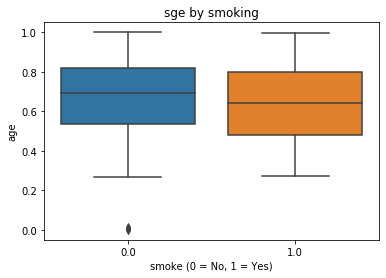

In [18]:
sns.boxplot(x='smoke', y='age', data=data)
plt.title("sge by smoking")
plt.xlabel("smoke (0 = No, 1 = Yes)")
plt.ylabel("age")
plt.show()

In [19]:
print(data.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')


## PREPROCESSING

In [20]:
data = pd.get_dummies(data, drop_first=True)


In [21]:
scaler = StandardScaler()
data[['age', 'height', 'weight']] = scaler.fit_transform(data[['age', 'height', 'weight']])

In [22]:
X = data.drop('active', axis=1)
y = data['active']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
import warnings

warnings.filterwarnings('ignore')

## LOGISTIC REGRESSION 

In [25]:
# Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")

Logistic Regression Performance:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2672
         1.0       0.80      1.00      0.89     10969

    accuracy                           0.80     13641
   macro avg       0.40      0.50      0.45     13641
weighted avg       0.65      0.80      0.72     13641

Accuracy: 0.80


## RANDOM FOREST

In [26]:
# Random Forest Model with Controlled Complexity
rf_model = RandomForestClassifier(
    n_estimators=100,  # Limit the number of trees
    max_depth=10,      # Restrict the depth of trees
    min_samples_split=10,  # Minimum samples to split a node
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Performance:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2672
         1.0       0.80      1.00      0.89     10969

    accuracy                           0.80     13641
   macro avg       0.40      0.50      0.45     13641
weighted avg       0.65      0.80      0.72     13641

Accuracy: 0.80


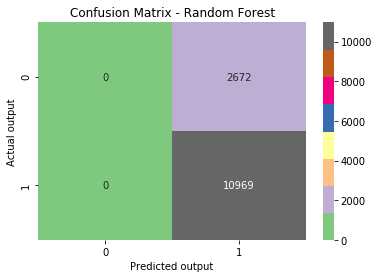

In [27]:
# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Accent')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted output")
plt.ylabel("Actual output")
plt.show()

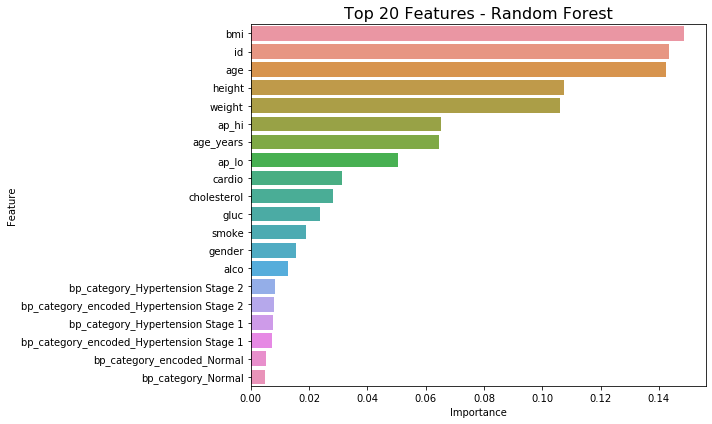

In [28]:
# Feature Importance
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_n = 20  # Show top 20 features
importance_df = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title(f"Top {top_n} Features - Random Forest", fontsize=16)
plt.tight_layout()
plt.show()